In [4]:
import pandas as pd
from pathlib import Path
import numpy as np
from scipy.spatial import KDTree
from matplotlib import pyplot as plt

## Src imports

In [38]:
import run_pipeline as rp
import src.data_loader as dl
import src.track_features as tf
import src.visualisation as vs
from importlib import reload
reload(rp)
reload(dl)
reload(tf)
reload(vs)

from run_pipeline import build_dataset
from src.track_features import car_from_ref_line
from src.visualisation import plot_k_turns, plot_laps

In [4]:
data = pd.read_csv('data/UNSW F12024.csv')

C:\Users\samue\AppData\Local\Temp\ipykernel_20948\314155161.py:1: DtypeWarning: Columns (70,71,73,74,82) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/UNSW F12024.csv')


In [3]:
cleanned_data = build_dataset()


Starting Data Pipeline

[1/6] Loading data...
   Loaded 6525414 race records
   Loaded track data

[2/6] Cleaning data...
   5614893 records after cleaning

[3/6] Filtering by distance...
   1246720 records after filtering

[4/6] Computing track features...


Processing car positions: 100%|██████████| 1246720/1246720 [02:29<00:00, 8315.27it/s]



[5/6] Computing apex features...

[6/6] Identifying off-track incidents...
   Found 0 off-track incidents

[7/7] Saving processed data...

Pipeline Complete!

Final dataset shape: (1246720, 49)
Columns: ['SESSION_GUID', 'CURRENTLAPNUM', 'SESSIONUID', 'SPEED', 'THROTTLE', 'STEER', 'BRAKE', 'GEAR', 'ENGINERP1', 'DRS', 'BRAKESTEMPERATURE_RL', 'BRAKESTEMPERATURE_RR', 'BRAKESTEMPERATURE_FL', 'BRAKESTEMPERATURE_FR', 'TYRESPRESSURE_RL', 'TYRESPRESSURE_RR', 'TYRESPRESSURE_FL', 'TYRESPRESSURE_FR', 'CURRENTLAPTIMEINMS', 'LAPDISTANCE', 'TOTALDISTANCE', 'CURRENTLAPNU1', 'CURRENTLAPINVALID', 'WORLDPOSITIONX', 'WORLDPOSITIONY', 'WORLDPOSITIONZ', 'WORLDFORWARDDIRX', 'WORLDFORWARDDIRY', 'WORLDFORWARDDIRZ', 'WORLDRIGHTDIRX', 'WORLDRIGHTDIRY', 'WORLDRIGHTDIRZ', 'YAW', 'PITCH', 'ROLL', 'FRONTWHEELSANGLE', 'TRACKID', 'R_STATUS', 'LAPTIME', 'CURRENTLAPTIME', 'left_dist', 'right_dist', 'l_width', 'r_width', 'dist_apex_1', 'dist_apex_2', 'angle_to_apex1', 'angle_to_apex2', 'invalid_lap']


In [ ]:
cleanned_data.to_csv("data/cleanned_data.csv")

In [6]:
cleanned_data = pd.read_csv("data/cleanned_data.csv")
DATAFOLDER = "data"
track_left = pd.read_csv(f"{DATAFOLDER}/f1sim-ref-left.csv")
track_right = pd.read_csv(f"{DATAFOLDER}/f1sim-ref-right.csv")
track_line = pd.read_csv(f"{DATAFOLDER}/f1sim-ref-line.csv")
turns = pd.read_csv(f"{DATAFOLDER}/f1sim-ref-turns.csv")


In [8]:
cleanned_data = car_from_ref_line(cleanned_data, track_line)

Referencing relative ref line: 100%|██████████| 1246720/1246720 [00:54<00:00, 22715.79it/s]


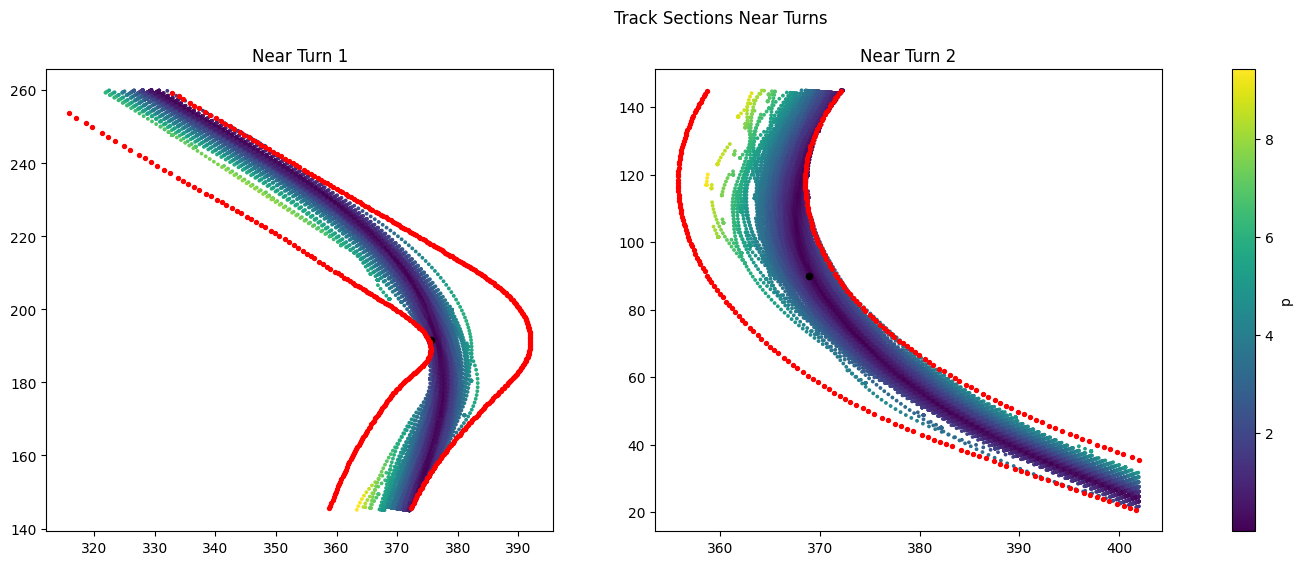

In [9]:
plot_k_turns(cleanned_data[cleanned_data["invalid_lap"] == 0], turns, track_left, track_right,x_col="WORLDPOSITIONX", y_col="WORLDPOSITIONY", color_col="proj_from_ref", k = 2)

In [14]:
cleanned_data[(cleanned_data["invalid_lap"] == 0) & (cleanned_data["LAPDISTANCE"] < 100) & (cleanned_data["BRAKE"] > 0.1)]

,Unnamed: 0,SESSION_GUID,CURRENTLAPNUM,SESSIONUID,SPEED,THROTTLE,STEER,BRAKE,GEAR,ENGINERP1,...,right_dist,l_width,r_width,dist_apex_1,dist_apex_2,angle_to_apex1,angle_to_apex2,invalid_lap,lap_id,proj_from_ref
975695,975695,31D5ED8FFA477286E0631818000AC168,2,9599716089532275357,231.0,1.0,-0.000203,0.144871,6.0,10551.0,...,8.184397,13.261554,13.260272,298.006607,374.594865,42.911001,31.407969,0,560,2.894252
975696,975696,31D5ED8FFA477286E0631818000AC168,2,9599716089532275357,231.0,1.0,-0.000369,0.144871,6.0,10551.0,...,8.192649,13.267978,13.267137,297.007942,373.626125,42.918456,31.386977,0,560,2.889747
975697,975697,31D5ED8FFA477286E0631818000AC168,2,9599716089532275357,231.0,1.0,-0.000560,0.144871,6.0,10551.0,...,8.201539,13.267978,13.267137,296.009347,372.657622,42.923441,31.363386,0,560,2.884493
975698,975698,31D5ED8FFA477286E0631818000AC168,2,9599716089532275357,231.0,1.0,-0.000800,0.144871,6.0,10552.0,...,8.210876,13.273649,13.274641,295.010885,371.689431,42.928338,31.339582,0,560,2.878731
975699,975699,31D5ED8FFA477286E0631818000AC168,2,9599716089532275357,231.0,1.0,-0.001041,0.144871,6.0,10553.0,...,8.220995,13.282798,13.284200,294.012431,370.721407,42.933168,31.315576,0,560,2.872642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245821,1245821,31D5ED8FFA477286E0631818000AC168,2,9599716089532275357,230.0,1.0,-0.000368,0.145320,6.0,10492.0,...,8.280627,13.255860,13.274249,342.954151,418.377724,43.155309,32.814084,0,560,2.342442
1245822,1245822,31D5ED8FFA477286E0631818000AC168,2,9599716089532275357,230.0,1.0,-0.000397,0.145612,6.0,10492.0,...,8.274655,13.255860,13.230472,341.954988,417.401259,43.132299,32.767617,0,560,2.549412
1245823,1245823,31D5ED8FFA477286E0631818000AC168,2,9599716089532275357,230.0,1.0,-0.000414,0.145808,6.0,10492.0,...,8.268738,13.255860,13.230472,340.955866,416.424946,43.121432,32.733189,0,560,2.400350
1245824,1245824,31D5ED8FFA477286E0631818000AC168,2,9599716089532275357,230.0,1.0,-0.000406,0.145808,6.0,10492.0,...,8.262936,13.186374,13.194358,339.956825,415.448827,43.132442,32.720539,0,560,2.585937


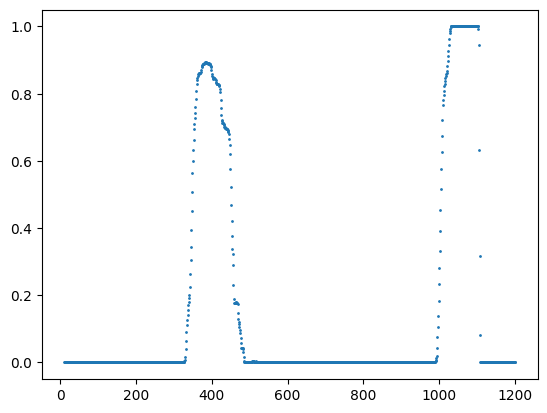

In [ ]:
l = 560
plt.scatter(cleanned_data[cleanned_data["lap_id"] == l]["LAPDISTANCE"], cleanned_data[cleanned_data["lap_id"] == l]["BRAKE"], s=1)

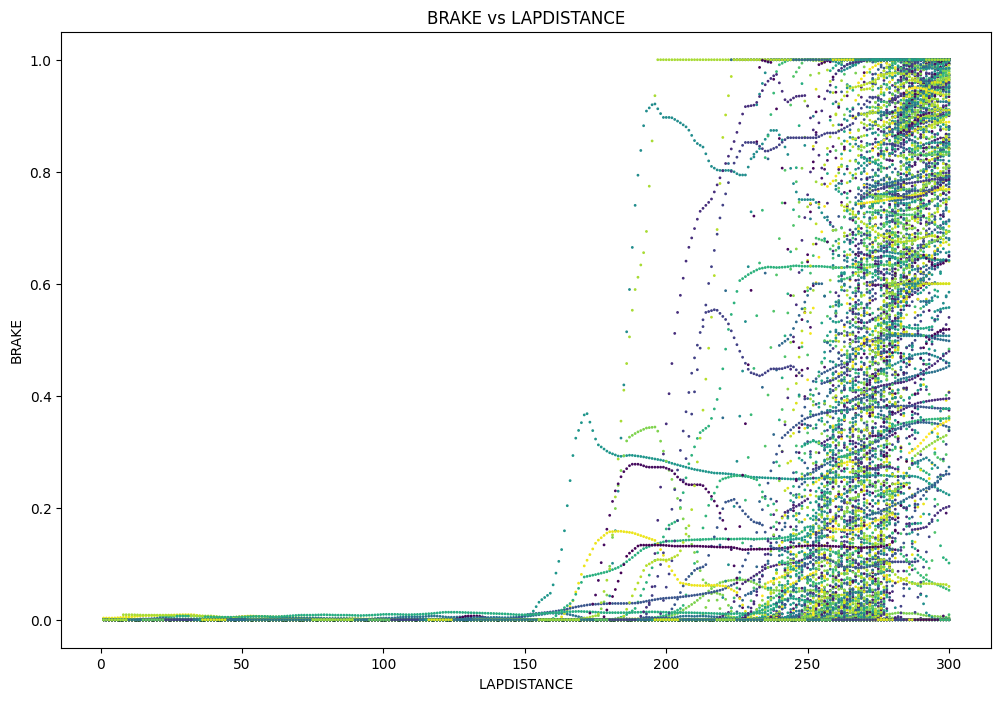

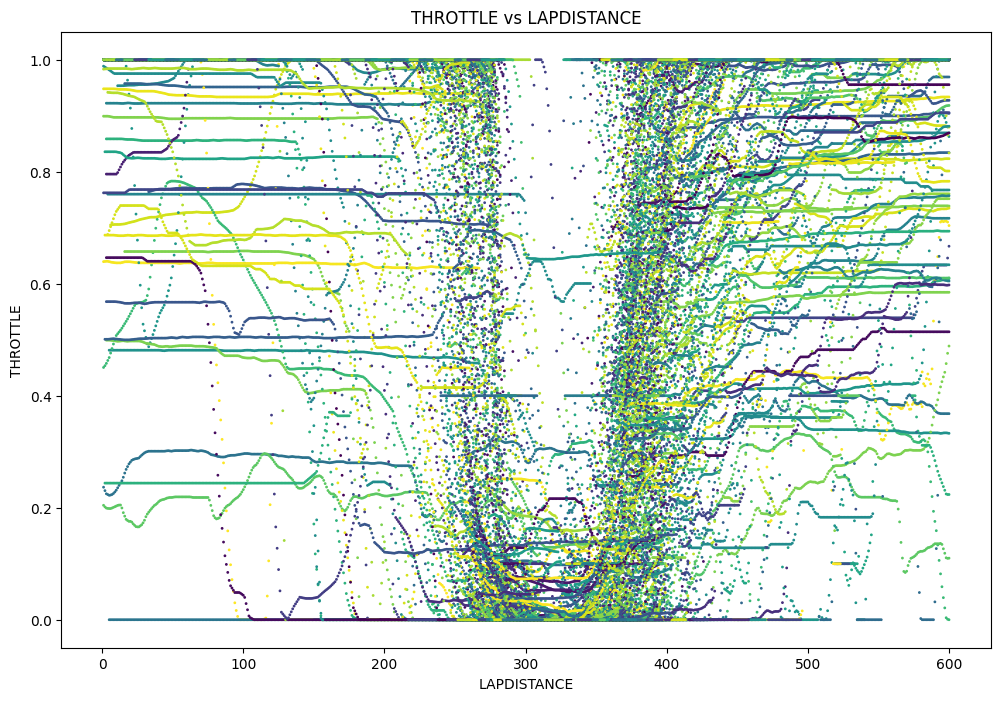

In [ ]:
plot_laps(cleanned_data, y_col="BRAKE", distance_range=(0, 300), exclude_laps=[560])
plot_laps(cleanned_data, y_col="THROTTLE", distance_range=(0, 600))